In [1]:
import numpy as np
import pandas as pd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler

#machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [2]:
df = pd.read_csv("C:/Users/kavur/Downloads/credit_history.csv")

In [3]:
df.head()

,default,amount,grade,years,ownership,income,age
0,0,1000,B,2.0,RENT,19200.0,24
1,1,6500,A,2.0,MORTGAGE,66000.0,28
2,0,2400,A,2.0,RENT,60000.0,36
3,0,10000,C,3.0,RENT,62000.0,24
4,1,4000,C,2.0,RENT,20000.0,28


In [4]:
pd.options.display.max_columns=None

In [5]:
df.describe()

,default,amount,years,income,age
count,7727.000000,7727.000000,7448.000000,7.727000e+03,7727.000000
mean,0.478452,9453.345412,6.086332,6.337197e+04,27.542125
std,0.499568,6298.595800,6.700758,4.687195e+04,6.132121
min,0.000000,500.000000,0.000000,4.000000e+03,20.000000
25%,0.000000,5000.000000,2.000000,3.700000e+04,23.000000
50%,0.000000,8000.000000,4.000000,5.400000e+04,26.000000
75%,1.000000,12000.000000,8.000000,7.679650e+04,30.000000
max,1.000000,35000.000000,62.000000,1.200000e+06,94.000000


In [6]:
df.shape

(7727, 7)

In [7]:
print("Number of Rows",df.shape[0])
print("Number of Rows",df.shape[1])

Number of Rows 7727
Number of Rows 7


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7727 entries, 0 to 7726
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   default    7727 non-null   int64  
 1   amount     7727 non-null   int64  
 2   grade      7727 non-null   object 
 3   years      7448 non-null   float64
 4   ownership  7727 non-null   object 
 5   income     7727 non-null   float64
 6   age        7727 non-null   int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 422.7+ KB


In [9]:
df.duplicated().any()
df  = df.drop_duplicates()
df.shape

(7332, 7)

In [10]:
df.isnull().sum()

default        0
amount         0
grade          0
years        270
ownership      0
income         0
age            0
dtype: int64

In [11]:
missing_data = df.isnull()
print(missing_data['years'].value_counts())

years
False    7062
True      270
Name: count, dtype: int64


In [12]:
avg = df['years'].astype("float").min()
df['years'].replace(np.nan, avg,inplace =True)

In [13]:
df.isnull().sum()

default      0
amount       0
grade        0
years        0
ownership    0
income       0
age          0
dtype: int64

In [14]:
df['default'].value_counts()

default
1    3684
0    3648
Name: count, dtype: int64

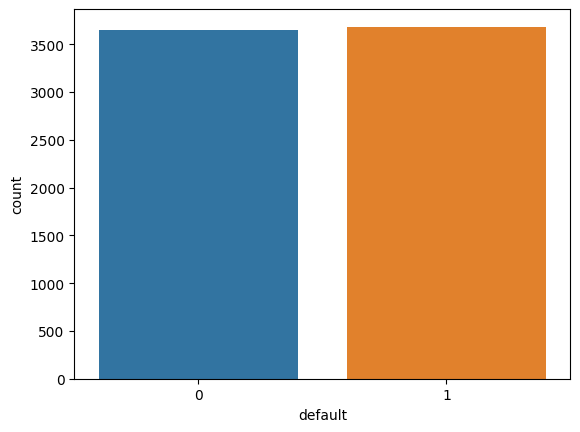

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check the distribution of the target variable
sns.countplot(x='default', data=df)
plt.show()

In [16]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['grade']= label_encoder.fit_transform(df['grade'])
df['grade']

0       1
1       0
2       0
3       2
4       2
       ..
7722    2
7723    1
7724    1
7725    1
7726    2
Name: grade, Length: 7332, dtype: int32

In [17]:
label_encoder = preprocessing.LabelEncoder()
df['ownership']= label_encoder.fit_transform(df['ownership'])
df['ownership']

0       3
1       0
2       3
3       3
4       3
       ..
7722    3
7723    3
7724    3
7725    3
7726    3
Name: ownership, Length: 7332, dtype: int32

In [18]:
df.describe()

,default,amount,grade,years,ownership,income,age
count,7332.000000,7332.000000,7332.000000,7332.000000,7332.000000,7.332000e+03,7332.000000
mean,0.502455,9455.070240,1.417076,5.859793,1.746863,6.308700e+04,27.563557
std,0.500028,6300.807033,1.230527,6.705406,1.420286,4.701674e+04,6.165381
min,0.000000,500.000000,0.000000,0.000000,0.000000,4.000000e+03,20.000000
25%,0.000000,5000.000000,0.000000,1.000000,0.000000,3.650000e+04,23.000000
50%,1.000000,8000.000000,1.000000,4.000000,3.000000,5.400000e+04,26.000000
75%,1.000000,12000.000000,2.000000,8.000000,3.000000,7.570275e+04,30.000000
max,1.000000,35000.000000,6.000000,62.000000,3.000000,1.200000e+06,94.000000


In [19]:
df.groupby('default').mean()

,amount,grade,years,ownership,income,age
default,,,,,,
0,9463.260691,1.067434,5.920779,1.666118,66803.895299,27.690515
1,9446.959826,1.763301,5.799403,1.826819,59406.417606,27.437839


In [20]:
X = df.drop('default',axis=1)
y = df['default']
print(X)
print(y)

      amount  grade  years  ownership   income  age
0       1000      1    2.0          3  19200.0   24
1       6500      0    2.0          0  66000.0   28
2       2400      0    2.0          3  60000.0   36
3      10000      2    3.0          3  62000.0   24
4       4000      2    2.0          3  20000.0   28
...      ...    ...    ...        ...      ...  ...
7722    6000      2    6.0          3  47628.0   24
7723    1500      1    5.0          3  18000.0   21
7724    4100      1   18.0          3  57000.0   26
7725    2000      1    0.0          3  25000.0   25
7726    6000      2    0.0          3  45000.0   25

[7332 rows x 6 columns]
0       0
1       1
2       0
3       0
4       1
       ..
7722    1
7723    1
7724    1
7725    1
7726    1
Name: default, Length: 7332, dtype: int64


In [21]:
df.head()

,default,amount,grade,years,ownership,income,age
0,0,1000,1,2.0,3,19200.0,24
1,1,6500,0,2.0,0,66000.0,28
2,0,2400,0,2.0,3,60000.0,36
3,0,10000,2,3.0,3,62000.0,24
4,1,4000,2,2.0,3,20000.0,28


In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=56)

In [23]:
def correlation(dataset,threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if corr_matrix.iloc[i,j] > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [24]:
corr_features = correlation(X_train,0.2)
print(len(set(corr_features)))
print(corr_features)

1
{'income'}


In [25]:
X_train_d = X_train.drop(corr_features,axis=1)
X_test_d = X_test.drop(corr_features,axis=1)

In [26]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6305385139740968


In [27]:
print(X_train.shape)
print(X_test.shape)

(5865, 6)
(1467, 6)


In [28]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
pred1 = model.predict(X_train)
acc1 = accuracy_score(pred1,y_train)
print("training accuracy: ",acc1)

pred = model.predict(X_test)
acc = accuracy_score(pred,y_test)
print("testing accuracy: ",acc)

# print('Precision:', precision_score(y_train,X_train_pred))
# print('Recall:', recall_score(y_train,X_train_pred))
# print('F1 score:', f1_score(y_train,X_train_pred))
# print('ROC AUC score:', roc_auc_score(y_train,X_train_pred))
# print(confusion_matrix(y_train, X_train_pred))

training accuracy:  0.9996589940323956
testing accuracy:  0.6509884117246081


In [29]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion ='entropy',max_features='sqrt',n_estimators=200,max_depth = 25,random_state=42,min_samples_leaf=5,min_samples_split=2)

model.fit(X_train, y_train)
pred1 = model.predict(X_train)
acc1 = accuracy_score(pred1,y_train)
print("train: ",acc1)

pred = model.predict(X_test)
acc = accuracy_score(pred,y_test)
print("test : ",acc)


x_labels_test = ['Accuracy', 'Precision', 'Recall','F1 score','ROC AUC score']
y_values_test = [accuracy_score(pred,y_test),precision_score(pred,y_test), recall_score(pred,y_test), f1_score(pred,y_test),roc_auc_score(pred,y_test)]

x_labels_train = ['Accuracy', 'Precision', 'Recall','F1 score','ROC AUC score']
y_values_train = [accuracy_score(pred1,y_train),precision_score(pred1,y_train), recall_score(pred1,y_train), f1_score(pred1,y_train),roc_auc_score(pred1,y_train)]


train:  0.8431372549019608
test :  0.6646216768916156


In [30]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(max_depth=10)
model3.fit(X_train, y_train)
X_train_pred3 = model3.predict(X_train)
acc3 = accuracy_score(y_train,X_train_pred3)
print(acc3)
X_test_pred3 = model3.predict(X_test)
t_acc3 = accuracy_score(X_test_pred3,y_test)
print(t_acc3)

x_labels3_test = ['Accuracy', 'Precision', 'Recall','F1 score','ROC AUC score']
y_values3_test = [accuracy_score(y_test,X_test_pred3),precision_score(y_test,X_test_pred3), recall_score(y_test,X_test_pred3), f1_score(y_test,X_test_pred3),roc_auc_score(y_test,X_test_pred3)]


x_labels3_train = ['Accuracy', 'Precision', 'Recall','F1 score','ROC AUC score']
y_values3_train = [accuracy_score(y_train,X_train_pred3),precision_score(y_train,X_train_pred3), recall_score(y_train,X_train_pred3), f1_score(y_train,X_train_pred3),roc_auc_score(y_train,X_train_pred3)]


0.7493606138107417
0.6080436264485344


In [31]:
from sklearn.svm import SVC
model2 = SVC()
model2.fit(X_train, y_train)
X_train_pred2 = model2.predict(X_train)
acc2 = accuracy_score(y_train,X_train_pred2)
print(acc2)

X_test_pred2 = model2.predict(X_test)
t_acc2 = accuracy_score(y_test,X_test_pred2)
print(t_acc2)

x_labels2_test = ['Accuracy', 'Precision', 'Recall','F1 score','ROC AUC score']
y_values2_test = [accuracy_score(y_test,X_test_pred2),precision_score(y_test,X_test_pred2), recall_score(y_test,X_test_pred2), f1_score(y_test,X_test_pred2),roc_auc_score(y_test,X_test_pred2)]


x_labels2_train = ['Accuracy', 'Precision', 'Recall','F1 score','ROC AUC score']
y_values2_train = [accuracy_score(y_train,X_train_pred2),precision_score(y_train,X_train_pred2), recall_score(y_train,X_train_pred2), f1_score(y_train,X_train_pred2),roc_auc_score(y_train,X_train_pred2)]


0.5623188405797102
0.5732788002726653


In [32]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)
X_train_pred1 = model1.predict(X_train)
acc1 = accuracy_score(y_train,X_train_pred1)
print(acc1)

X_test_pred1 = model1.predict(X_test)
t_acc1 = accuracy_score(y_test,X_test_pred1)
print(t_acc1)

x_labels1_test = ['Accuracy', 'Precision', 'Recall','F1 score','ROC AUC score']
y_values1_test = [accuracy_score(y_test,X_test_pred1),precision_score(y_test,X_test_pred1), recall_score(y_test,X_test_pred1), f1_score(y_test,X_test_pred1),roc_auc_score(y_test,X_test_pred1)]


x_labels1_train = ['Accuracy', 'Precision', 'Recall','F1 score','ROC AUC score']
y_values1_train = [accuracy_score(y_train,X_train_pred1),precision_score(y_train,X_train_pred1), recall_score(y_train,X_train_pred1), f1_score(y_train,X_train_pred1),roc_auc_score(y_train,X_train_pred1)]


0.5352088661551577
0.5480572597137015


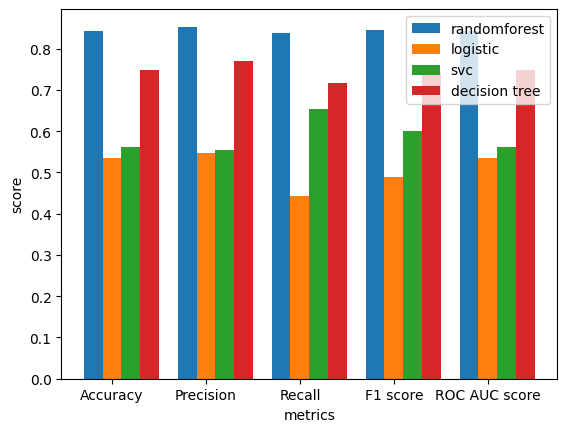

In [33]:
w=0.2
z = ['Accuracy', 'Precision', 'Recall','F1 score','ROC AUC score']
bar1 = np.arange(len(z))
bar2 = [i+w for i in bar1]
bar3 = [i+w for i in bar2]
bar4 = [i+w for i in bar3]
plt.bar(bar1,y_values_train,w,label = "randomforest")
plt.bar(bar2,y_values1_train,w,label = "logistic")
plt.bar(bar3,y_values2_train,w,label = "svc")
plt.bar(bar4,y_values3_train,w,label = "decision tree")
plt.xlabel("metrics")
plt.ylabel("score")
plt.xticks(bar1+w,z)
plt.legend()
plt.show()

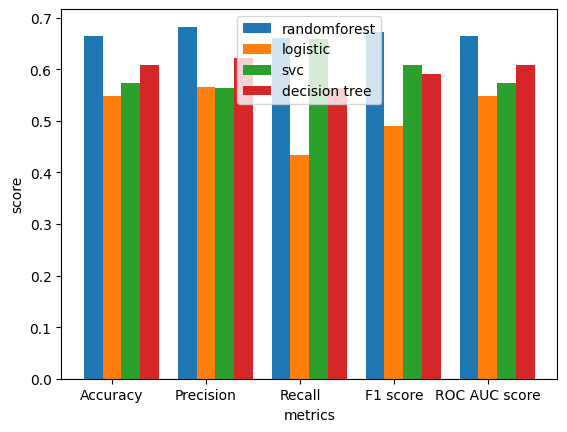

In [34]:
w=0.2
z = ['Accuracy', 'Precision', 'Recall','F1 score','ROC AUC score']
bar1 = np.arange(len(z))
bar2 = [i+w for i in bar1]
bar3 = [i+w for i in bar2]
bar4 = [i+w for i in bar3]
plt.bar(bar1,y_values_test,w,label = "randomforest")
plt.bar(bar2,y_values1_test,w,label = "logistic")
plt.bar(bar3,y_values2_test,w,label = "svc")
plt.bar(bar4,y_values3_test,w,label = "decision tree")
plt.xlabel("metrics")
plt.ylabel("score")
plt.xticks(bar1+w,z)
plt.legend()
plt.show()

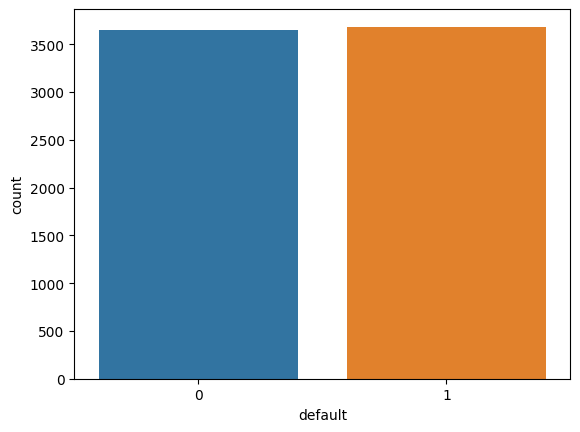

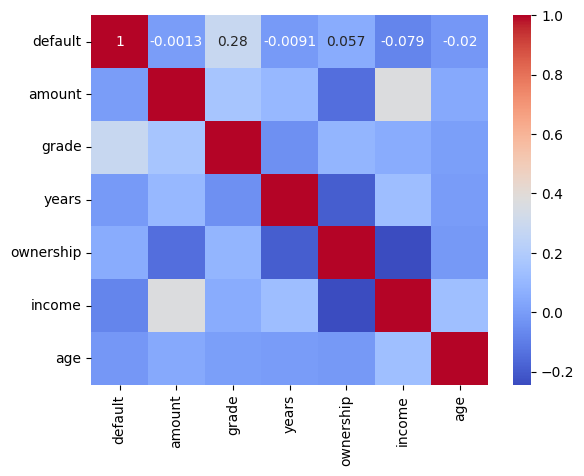

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check the distribution of the target variable
sns.countplot(x='default', data=df)
plt.show()

# Check the correlation between the features
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [36]:
def correlation(dataset,threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if corr_matrix.iloc[i,j] > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [37]:
corr_features = correlation(X_train,0.2)
print(len(set(corr_features)))
print(corr_features)

1
{'income'}


In [38]:
X_train_d = X_train.drop(corr_features,axis=1)
X_test_d = X_test.drop(corr_features,axis=1)

In [39]:
print(__doc__)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

Automatically created module for IPython interactive environment


In [40]:
rf1 = RandomForestClassifier()
rf1.fit(X_train,y_train)

RandomForestClassifier()

In [41]:
import joblib
joblib.dump(rf1,"credit_history")

['credit_history']

In [42]:
model = joblib.load("credit_history")

In [43]:
pred = model.predict([[6500	,0	,2.0,	0,	66000.0	,28]])
# 6500	0	2.0	0	66000.0	28
print(pred)

[1]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [44]:
if pred == 0:
  print("Normal Transaction")
else:
  print("Fraudlant Transaction")

Fraudlant Transaction


In [45]:
# from tkinter import *
# import tkinter as TK
# import joblib

# def show_entry_field():
#   Amount = float(e1.get())
#   Grade = float(e1.get())
#   Years = float(e1.get())
#   Ownership = float(e1.get())
#   Income = float(e1.get())
#   Age= float(e1.get())
#   model = joblib.load('credit_history')
#   y_pred = model.predict(([Amount,Grade,Years,Ownership,Income,Age]))
#   list1 = [Amount,Grade,Years,Ownership,Income,Age]
#   result = []
#   if y_pred==0:
#     result.append("Normal")
#   else:
#     result.append("Fraudulent")

#   print("Credit Card Fraud Detection System",result)

#   Label(master,text="Final Prediction from the model - Credit Card Fruad Detection")
#   Label(master,text=result).grid(row=6)

# master = Tk()
# master.title("Credit Card Fraud Detection System")

# label=Label(master,text="Credit Card Fraud Detection System",bg="black",fg ="white",width=30).grid(row=6,column=1)

# Label(master,text="Enter").grid(row=1,column=1)
# Label(master,text="Enter").grid(row=2,column=1)
# Label(master,text="Enter").grid(row=3,column=1)
# Label(master,text="Enter").grid(row=4,column=1)
# Label(master,text="Enter").grid(row=5,column=1)
# Label(master,text="Enter").grid(row=6,column=1)


# e1=Entry(master)
# e2=Entry(master)
# e3=Entry(master)
# e4=Entry(master)
# e5=Entry(master)
# e6=Entry(master)

# e1.grid(row=1,column=1)
# e2.grid(row=2,column=1)
# e3.grid(row=3,column=1)
# e4.grid(row=4,column=1)
# e5.grid(row=5,column=1)
# e6.grid(row=6,column=1)


# Button(master,text = 'Predict',command=show_entry_field).grid(row=7,column=1)

# mainloop()



In [46]:
import joblib
import gradio as gr

def credit_card_fraud_detection(amount, grade, years, ownership, income, age):
  model = joblib.load('credit_history')
  y_pred = model.predict([[amount, grade, years, ownership, income, age]])
  if y_pred == 1:
    result = "Fraudulant Transaction"
  else:
    result = "Normal Transaction"
  return result

inputs = [gr.Number(label="Amount"),
          gr.Number(label="Grade"),
          gr.Number(label="Years"),
          gr.Number(label="Ownership"),
          gr.Number(label="Income"),
          gr.Number(label="Age")]

output = gr.Textbox(label="Prediction")

interface = gr.Interface(fn=credit_card_fraud_detection, inputs=inputs, outputs=output, title="Credit Card Fraud Detection System")
interface.launch()

# 6500	0	2.0	0	66000.0	28

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
